In [1]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode
from langchain.chat_models import init_chat_model

In [4]:
%pip install -qU langchain-tavily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from langchain_tavily import TavilySearch

In [6]:
tavily_tool = TavilySearch(
    max_results=3,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [7]:
model_id = "gemini-2.0-flash-lite-001"
gemini_llm = init_chat_model(model = model_id,model_provider="google_vertexai")

c:\Users\srina\OneDrive\Desktop\GenAI_code\ConditionalGraph\.venv\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [8]:
tool_node = ToolNode([tavily_tool])
gemini_llm_with_tools = gemini_llm.bind_tools([tavily_tool])

In [9]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = gemini_llm_with_tools.invoke(state['messages'])
    return state

In [10]:
tools_graph_builder = StateGraph(MessagesState)
tools_graph_builder.add_node("llm", call_model)
tools_graph_builder.add_node("tools", tool_node)
tools_graph_builder.add_edge("llm", "tools")
tools_graph_builder.set_entry_point("llm")
tools_graph_builder.set_finish_point("tools")
tools_graph = tools_graph_builder.compile()

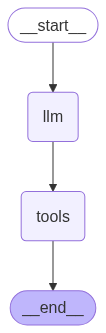

In [11]:
from IPython.display import Image, display
display(Image(tools_graph.get_graph().draw_mermaid_png()))

In [12]:
results = tools_graph.invoke({"messages": "What are latest updates from Google Gemini?"})
results

c:\Users\srina\OneDrive\Desktop\GenAI_code\ConditionalGraph\.venv\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


{'messages': [HumanMessage(content='What are latest updates from Google Gemini?', additional_kwargs={}, response_metadata={}, id='20d3bdbe-bd63-4f9a-93d8-e162eb926e21'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"query": "latest updates from Google Gemini", "topic": "general"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 770, 'candidates_token_count': 12, 'total_token_count': 782, 'prompt_tokens_details': [{'modality': 1, 'token_count': 770}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 12}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.10475711027781169, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--c235b46e-1699-4c02-b900-fb14bcc441c7-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'latest updates from Google Gemini', 'topic': 'general'}, 'id'

In [13]:
import json
parsed_result = json.loads(results['messages'][-1].content)
parsed_result

{'query': 'latest updates from Google Gemini',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Get the latest news about Google Gemini - gemini.google',
   'url': 'https://gemini.google/latest-news/?hl=en',
   'content': 'Tulsi Doshi (Head of Product, Gemini) and Josh Woodward (VP of Google Labs and Google Gemini) join host Logan Kilpatrick from Google I/O 2025 for a special edition of Release Notes. They unpack the latest launches, new models and tools for developers. Listen to learn more about 2.5 Pro Deep Think, Veo 3 and AI coding agents like Jules and Stitch.',
   'score': 0.7827459,
   'raw_content': None},
  {'title': 'Official Gemini news and updates | Google Blog - The Keyword',
   'url': 'https://blog.google/products/gemini/',
   'content': 'Google DeepMind Gemini 2.5: Our most intelligent models are getting even better At I/O 2025, we shared updates to our Gemini 2.5 model series and Deep Think, an experimental enhanced reasoning mode fo

In [14]:
for result in parsed_result['results']:
    print(result['content'])

Tulsi Doshi (Head of Product, Gemini) and Josh Woodward (VP of Google Labs and Google Gemini) join host Logan Kilpatrick from Google I/O 2025 for a special edition of Release Notes. They unpack the latest launches, new models and tools for developers. Listen to learn more about 2.5 Pro Deep Think, Veo 3 and AI coding agents like Jules and Stitch.
Google DeepMind Gemini 2.5: Our most intelligent models are getting even better At I/O 2025, we shared updates to our Gemini 2.5 model series and Deep Think, an experimental enhanced reasoning mode for 2.5 Pro.
Produce stunning visuals and videos with Imagen 4 and Veo 3. The Gemini app makes it easy to go from an idea to breathtaking images and videos. Whether you're designing a sleek professional presentation, whipping up social media graphics or crafting event invitations, Imagen 4 delivers visuals that pop with lifelike detail and better text and typography outputs.


In [15]:
#openweathe API
#https://python.langchain.com/docs/integrations/tools/openweathermap/
%pip install --upgrade --quiet pyowm
%pip install langchain-community

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
load_dotenv()

True

In [28]:
from langchain_community.utilities import OpenWeatherMapAPIWrapper

In [29]:
weather = OpenWeatherMapAPIWrapper()
tools = [weather.run]

In [30]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [31]:
gemini_llm_with_tools = gemini_llm.bind_tools(tools)

In [32]:
tool_node = ToolNode(tools)

In [33]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = gemini_llm_with_tools.invoke(state['messages'])
    return state

In [34]:
tools_graph_builder = StateGraph(MessagesState)
tools_graph_builder.add_node("llm", call_model)
tools_graph_builder.add_node("tools", tool_node)
tools_graph_builder.add_edge("llm", "tools")
tools_graph_builder.set_entry_point("llm")
tools_graph_builder.set_finish_point("tools")
tools_graph = tools_graph_builder.compile()

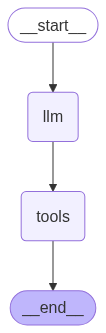

In [35]:
from IPython.display import Image, display
display(Image(tools_graph.get_graph().draw_mermaid_png()))

In [36]:
results = tools_graph.invoke({"messages": "What is Weather like in Hyderabad"})
print(results['messages'][-1].content)

c:\Users\srina\OneDrive\Desktop\GenAI_code\ConditionalGraph\.venv\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In Hyderabad, the current weather is as follows:
Detailed status: overcast clouds
Wind speed: 7.08 m/s, direction: 260°
Humidity: 57%
Temperature: 
  - Current: 30.31°C
  - High: 30.31°C
  - Low: 30.31°C
  - Feels like: 32.81°C
Rain: {}
Heat index: None
Cloud cover: 99%
